# Dataset Titanic

El dataset del Titanic, es un conjunto de datos clásico utilizado para tareas de clasificación binaria. Se basa en información histórica de los pasajeros del RMS Titanic, que se hundió en 1912 tras chocar con un iceberg. El objetivo principal es predecir si un pasajero sobrevivió o no, basado en características como su clase social,
edad, género y otros factores socioeconómicos.

El RMS Titanic se hundió el 15 de abril de 1912 durante su viaje inaugural. De las aproximadamente 2,224
personas a bordo, más de 1,500 murieron, convirtiendo este evento en uno de los naufragios más mortíferos en tiempos de paz.

| **Atributo** |                         **Descripción**                          |
|:------------:|:----------------------------------------------------------------:|
| PassengerId  |                 Identificador único del pasajero                 |
|   Survived   | Variable objetivo: Indica si el pasajero sobrevivió (1) o no (0) |
|    Pclass    |        Clase del ticket (proxy de estatus socioeconómico)        |
|     Name     | Nombre completo del pasajero, incluyendo títulos (ej. Mr., Mrs.) |
|     Sex      |                Género del pasajero (male, female)                |
|     Age      |          Edad en años (puede ser fraccional para niños)          |
|    SibSp     |                Número de hermanos/esposos a bordo                |
|    Parch     |                  Número de padres/hijos a bordo                  |
|    Ticket    |                        Número del ticket                         |
|     Fare     |                   Tarifa pagada por el ticket                    |
|    Cabin     |               Número de cabina (muchos faltantes)                |
|   Embarked   |                   Puerto de embarque (C, Q, S)                   |


In [30]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    # Cargar el dataset
    url = "https://raw.githubusercontent.com/aap-unlp/datasets/main/titanic/titanic.csv"
    data = pd.read_csv(url)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Ejercicio 7

Realice las siguientes tareas para preparar el dataset para que pueda ser utilizado para entrenar modelos de redes neuronales.

### a) Visualice las primeras 5 filas y el resumen estadístico.

Sex
male      577
female    314
Name: count, dtype: int64


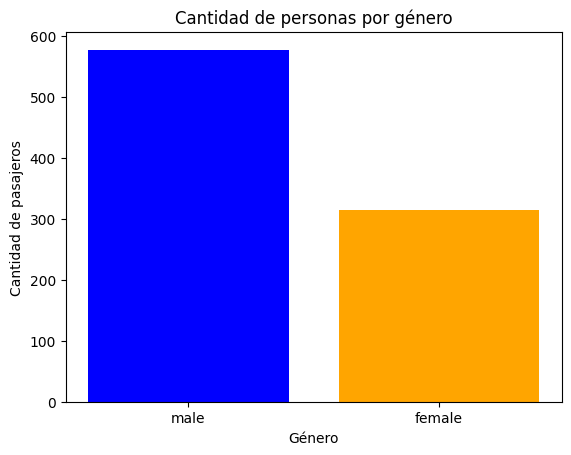

In [31]:
data.head()
barras = data['Sex'].value_counts()
print(barras)

# Gráfico de barras
plt.figure()
plt.bar(barras.index, barras.values, color=['blue', 'orange'])
plt.xlabel('Género')
plt.ylabel('Cantidad de pasajeros')
plt.title('Cantidad de personas por género')
plt.show()

### b) Identifique los atributos (columnas) con valores nulos y su porcentaje.

In [39]:
# Cantidad de valores nulos por columna
missing_counts = data.isnull().sum()

# Porcentaje de valores nulos por columna
missing_percent = (missing_counts / len(data)) * 100

# Mostrar ambos
print("Valores nulos por columna:")
display(missing_counts)

print("\nPorcentaje de valores nulos por columna:")
display(missing_percent)
#Age 19.86
#Cabin 77.10


Valores nulos por columna:


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            26
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           8
Embarked        2
Title           0
FamilySize      0
IsAlone         0
dtype: int64


Porcentaje de valores nulos por columna:


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            2.918070
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.897868
Embarked       0.224467
Title          0.000000
FamilySize     0.000000
IsAlone        0.000000
dtype: float64

### c) Analizar los valores faltantes y discutir cuales serían las alternativas posibles para tratarlos.

In [ ]:
#Se pueden reemplazar valores faltantes con la media o mediana de la columna, o eliminarlos. Por ejemplo, para la columna 'Age', podemos usar la mediana:
#data['Age'].fillna(data['Age'].median(), inplace=True). 
#Tambien se pueden crear atributos derivados

### d) Los nombres de los pasajeros van acompañados de títulos que pueden ser importantes para la interpretación de los datos o para completar información faltante:

**i.** Extrae el título (como Mr, Miss, Mrs, Master, etc.) del nombre de cada pasajero y crea una nueva columna llamada Title.

**ii.** Unifica los valores para que queden Mr, Miss (Mlle, Ms), Mrs (Mme), Master, Others (resto).

**iii.** Computa las edades faltantes utilizando la edad promedio por categoría.


In [38]:
#I
data['Title'] = data['Name'].str.extract(r', ([^\.]+)\.', expand=False)
print(data['Title'].value_counts())
#II
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Countess',
               'the Countess', 'Don', 'Dona', 'Jonkheer']
data['Title'] = data['Title'].replace(rare_titles, 'Other')
display(data['Title'].value_counts())
#III
data['Age'] = data['Age'].fillna(
    data.groupby(['Sex','Survived', 'Pclass','SibSp','Parch','Cabin'])['Age'].transform('mean')
)



Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

### e) Complete los valores faltantes utilizando las estrategias planteadas en los puntos anteriores.

In [34]:
data['Cabin'] = data['Cabin'].fillna(
    data.groupby(['Title', 'Pclass'])['Cabin'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)


### f) Cree un nuevo atributo FamilySize que contabiliza los integrantes de familia a partir de los atributos SibSp (hermanos y esposo) y Parch (padres e hijos). No olvidar contar a la persona.

In [35]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

### g) Numerice los atributos categóricos: Sex, Embarked, y Title.

In [41]:
# Mapear 'Sex'
data['Sex'] = data['Sex'].map({'male': 1, 'female': 2})

# Rellenar faltantes en 'Embarked' y mapear
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

# Mapear 'Title'
data['Title'] = data['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5})
print(data['Sex'].describe())
print(data['Embarked'].describe())
print(data['Title'].describe())


count    891.000000
mean       1.352413
std        0.477990
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Sex, dtype: float64
count    891.000000
mean       1.361392
std        0.635673
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Embarked, dtype: float64
count    891.000000
mean       1.728395
std        1.030039
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Title, dtype: float64


### h) Discuta y responda ¿Por qué one-hot encoding podría ser preferible a label encoding para el atributo Pclass?

In [ ]:
#Porque hay muchos proxys de clase

### i) Visualiza distribuciones: Histograma de Age, gráfico de barras para Survived por Sex y Pclass.

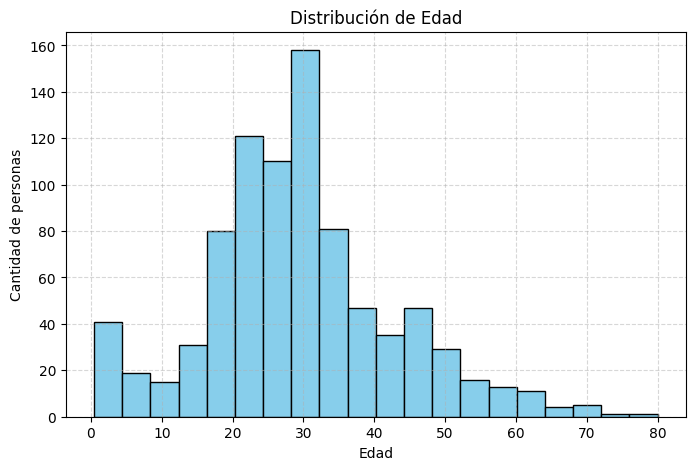

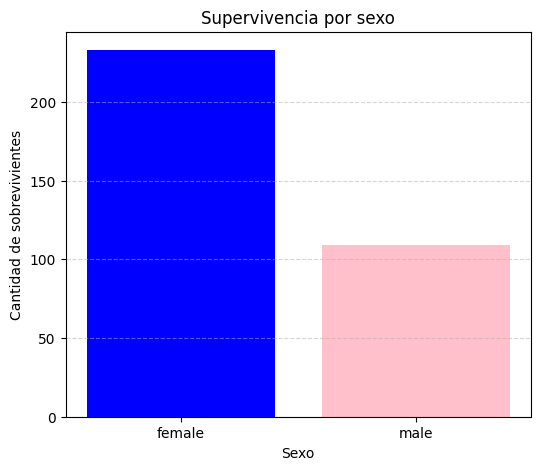

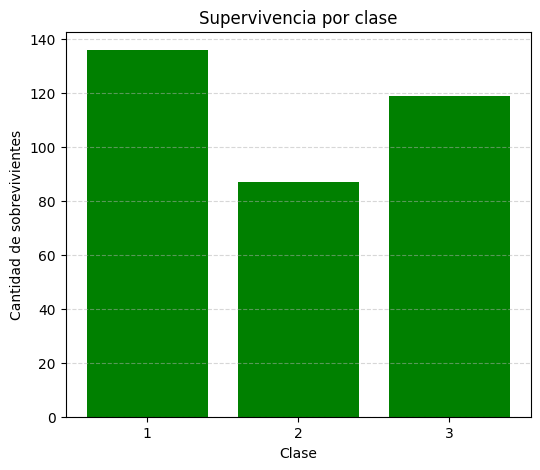

In [ ]:

plt.figure(figsize=(8, 5))
plt.hist(data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de Edad')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Asegurarse de tener los valores originales de 'Sex'
sex_map = {1: 'male', 2: 'female'}
data['Sex_label'] = data['Sex'].map(sex_map)

# Agrupar por 'Sex' y contar sobrevivientes
surv_sex = data.groupby('Sex_label')['Survived'].sum()

plt.figure(figsize=(6, 5))
plt.bar(surv_sex.index, surv_sex.values, color=['blue', 'pink'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sobrevivientes')
plt.title('Supervivencia por sexo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Agrupar por clase y contar sobrevivientes
surv_class = data.groupby('Pclass')['Survived'].sum()

plt.figure(figsize=(6, 5))
plt.bar(surv_class.index.astype(str), surv_class.values, color='green')
plt.xlabel('Clase')
plt.ylabel('Cantidad de sobrevivientes')
plt.title('Supervivencia por clase')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



## Ejercicio 8

Calcule la correlación lineal entre los atributos **“Fare”** (Tarifa) y **“PClass”** (clase del ticket). Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa). Explique el significado del valor de correlación obtenido.

<div style="display: flex; justify-content: center;">
  <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; text-align: center;">
    <thead>
      <tr>
	  	<th></th>
        <th style="background-color:#2E86C1; color:white;">Fare/PClass</th>
        <th style="background-color:#2E86C1; color:white;">PClass</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Valor</td>
        <td></td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Intensidad</td>
        <td></td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Tipo</td>
        <td></td>
		<td></td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Significado</td>
        <td></td>
		<td></td>
      </tr>
    </tbody>
  </table>
</div>


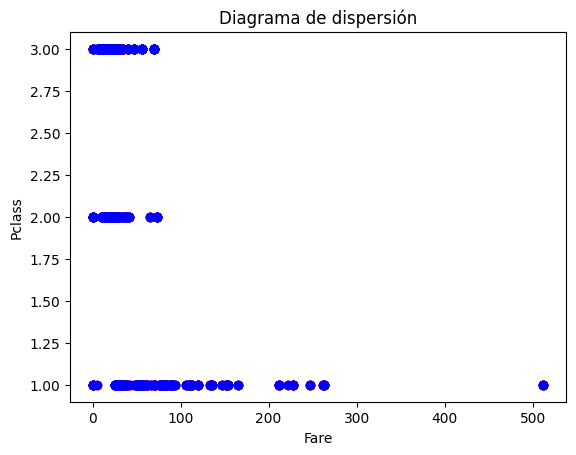

Coeficiente de correlación: -0.5494996199439074


In [56]:
plt.figure()
plt.plot(data.Fare, data.Pclass, 'or')
plt.plot(data.Fare, data.Pclass, 'ob')
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.title('Diagrama de dispersión')
plt.show()

correlacion1 = data['Fare'].corr(data['Pclass'])  # ejemplo con tus columnas
print("Coeficiente de correlación:", correlacion1)
#tienen relacion nula


## Ejercicio 9

Realice un análisis sobre los valores de los atributos del dataset automobile.csv. Para cada atributo que no pueda ser procesado directamente, indique que problema tiene (valores nulos o vacíos, valores categóricos, valores atípicos o outliers, etc.) y como solucionarlo.

In [15]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Data_Sets/p1/' # carpeta LOCAL donde se encuentran los datasets


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv(DATOS_DIR + 'automobile.csv')




In [19]:
print(data2.dtypes)

# Cantidad de valores nulos por columna
missing_counts2 = data2.isnull().sum()
print("Valores nulos por columna:")
display(missing_counts2)

#Vemos si en vez de nan estan puestos como '?'
print((data2 == '?').sum())

#Para solucionarlo:
data2 = data2.replace('?', np.nan)




symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
Valores nulos por columna:


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Hay atributos como price,horsepower, peak-rpm, bore, stroke, normalized-losses, que deberian ser numericos, ademas de que los nulos se muestran como '?' en vez de 'nan'

## Ejercicio 10

Dada la siguiente tabla con mediciones de 2 características correspondientes a mediciones de altura y peso de personas:

<div style="display: flex; justify-content: center;">
  <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; text-align: center;">
    <tbody>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Altura</td>
		<td>1.65</td> <td>1.81</td> <td>1.70</td> <td>1.62</td> <td>1.74</td> <td>1.70</td> <td>1.80</td> <td>1.73</td> <td>1.68</td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Peso</td>
        <td>75</td> <td>86</td> <td>82</td> <td>78</td> <td>77</td> <td>87</td> <td>90</td> <td>83</td> <td>80</td>
      </tr>
    </tbody>
  </table>
</div>

### a) Aplique las siguientes normalizaciones y grafíquelas con un diagrama de caja:

$$
MinMax: \frac{x_{i}-min(x)}{max(x)- min(x)}\quad\quad\quad\quad Standard: \frac{x_{i} - media(x)}{stddev(x)} \quad\quad\quad\quad Robust: \frac{x_{i} - Q1(x)}{Q3(x)-Q1(x)}
$$

In [21]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Data_Sets/p1/' # carpeta LOCAL donde se encuentran los datasets


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data3 = pd.read_csv(DATOS_DIR + 'ejercicio10.csv')

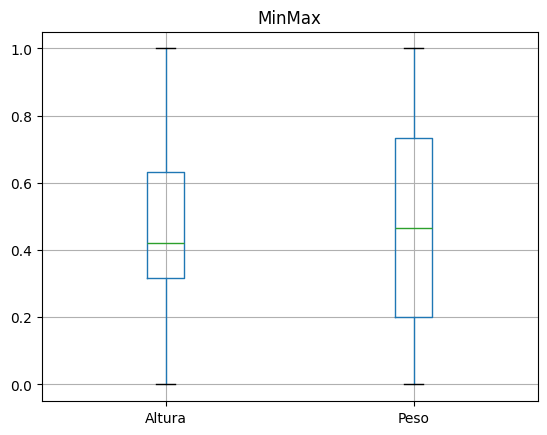

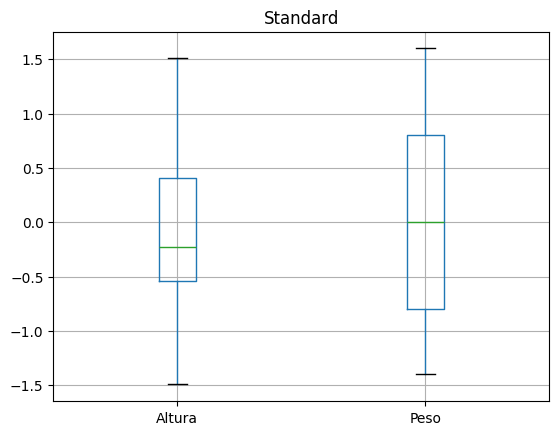

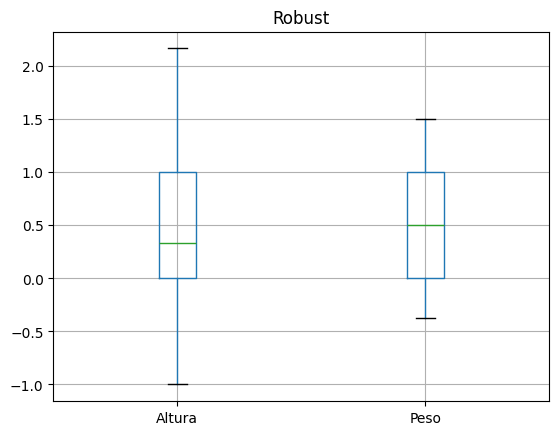

In [31]:


MinMax = (data3 - data3.min()) / (data3.max() - data3.min())
plt.figure()
MinMax.boxplot()
plt.title("MinMax")

Standar = (data3 - data3.mean()) / data3.std()
plt.figure()
Standar.boxplot()
plt.title("Standard")

Robust = (data3 - data3.quantile(0.25)) / (data3.quantile(0.75) - data3.quantile(0.25))
plt.figure()
Robust.boxplot()
plt.title("Robust")

plt.show()


### b) Agregue la siguiente medición (2.20, 120) y repita el punto a)

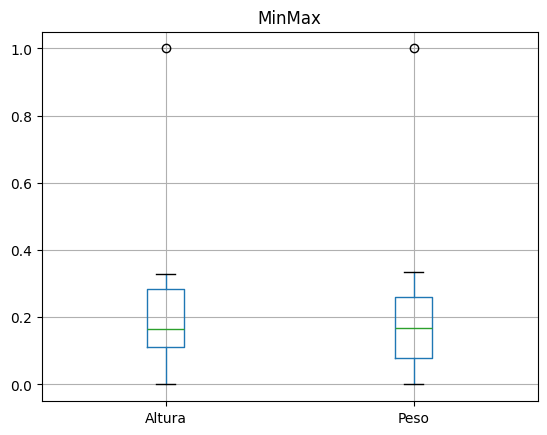

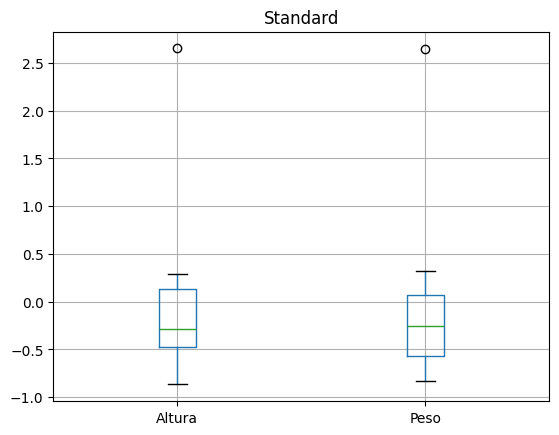

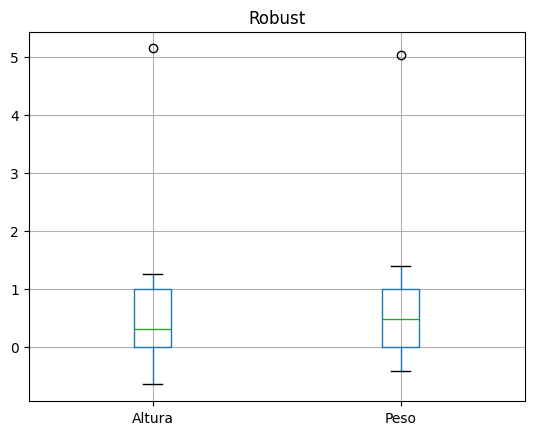

In [33]:
#data3.loc[len(data3)] = [2.20, 120]
#print(data3.tail())
MinMax = (data3 - data3.min()) / (data3.max() - data3.min())
plt.figure()
MinMax.boxplot()
plt.title("MinMax")

Standar = (data3 - data3.mean()) / data3.std()
plt.figure()
Standar.boxplot()
plt.title("Standard")

Robust = (data3 - data3.quantile(0.25)) / (data3.quantile(0.75) - data3.quantile(0.25))
plt.figure()
Robust.boxplot()
plt.title("Robust")

plt.show()

### c) Compare los diagramas de caja entre las normalizaciones de los puntos a) y b) y comente las diferencias.

### Las tres normalizaciones reducen la escala original, modificando el RIC, los bigotes y la posición de la mediana. Esto genera mayor centralización de los datos y resalta la presencia de valores atípicos extremos que en la escala original no eran tan evidentes.